IP3 diagram
---

The IP3 can be determined by the two-tone test: <br/>
$OIP3 = P_{out} + \Delta / 2$<br/><br/>

Provided that $OIP3 = IIP3 + G$: <br/>
$IIP3 = P_{out} - G + \Delta / 2$<br/>

In general, the IIPN can be calculated as follows:<br/>
$IIPN = P_{out} - G + \frac{\Delta}{n-1}$<br/>

The power of the intermodulation products at the output can be calculated as:<br/>
$P_{out, IMN} = n \cdot P_{in} - (n-1) \cdot IIPN + G$ <br/>



In [9]:
# Equations
IIP(P_out, G, Delta, n) = (P_out - G) + Delta/(n-1) # RF Design Guide. Vizmuller. pg. 36
PoutIMN(n, P_in, G, IIPN) = n*P_in - (n-1)*IIPN + G
P_out(P_in, G) = P_in + G

Amplifier parameters
---

In [10]:
# Amplifier parameters - Minicircuits PHA-1H+ (https://www.minicircuits.com/pdfs/PHA-1H+.pdf)
Amplifier_name = "Minicircuits PHA-1H+"
G = 16 #dB. System gain
Pout = 20 #dBm. Carrier level
Delta = 40 #dB. Difference between the carrier level and the IM product
n = 3 #Order of the IM product
CPo = 22 #dBm. Compression point
SImin = 54 #dB. Minimum S/I for proper operation

# Noise floor
NF = 2 #dB. Noise figure
BW = 1200e6#Hz. Bandwidth
T = 290 #K. Temperature

In [12]:
# Intercept point calculation
IIPn = IIP(P_out=Pout, G=G, Delta=Delta, n=n)
OIPn = IIPn + G;
print("IIP%s: %s " %(n, IIPn.n(digits=3)) + "dBm")
print("OIP%s: %s " %(n,OIPn.n(digits=3)) + "dBm")

IIP3: 24.0 dBm
OIP3: 40.0 dBm


In [13]:
# Input compression point
CPi = CPo - (G-1)

In [14]:
# Noise floor calculation
k = 1.3806503e-23 #J/K
No = k*T*BW*10^(.1*(NF+G)) #W
No_dBm = 10*log(No, 10) + 30 #dBm
print("Noise floor: %s " %No_dBm.n(digits=3) + "dBm")

Noise floor: -65.2 dBm


Dynamic range
-----------------------------

The upper limit of the dynamic range is determined by the minimum S/I ratio, so we need to find the input power for what the difference between the output power and the intermodulation products is equal to the minimum S/I

$P_{out} = P_{in} + G \;$ <br/>
$P_{outIM3} = 3 \cdot P_{in} - 2 \cdot IIP3 + G$

Then, the upper limit of the dynamic range is given by:<br/>
$P_{out} - P_{outIM3} = SI_{min}$, so<br/>

$(P_{in} + G) - (3 \cdot P_{in} - 2 \cdot IIP3 + G) = SI_{min}$<br/>

$-2 \cdot P_{in} + 2 \cdot IIP3 = SI_{min} \Rightarrow P_{in} =  IIP3 - \frac{SI_{min}}{2}$<\br>

So, under such circumstances, the output power is: <br/>
$P_{out} = P_{in} + G = IIP3 + G - \frac{SI_{min}}{2}G$

On the other hand, the lower limit of the dynamic range is determined by the noise floor.



In [15]:
# Dynamic range
Pin_Upper_Limit = (SImin - (n-1)*IIPn)/(1-n);
Pout_Upper_Limit = Pin_Upper_Limit + G;
Lower_Limit = No_dBm
DR = Pin_Upper_Limit - Lower_Limit
print("Dynamic Range: %s " %DR.n(digits=4) + "dB")

Dynamic Range: 62.18 dB


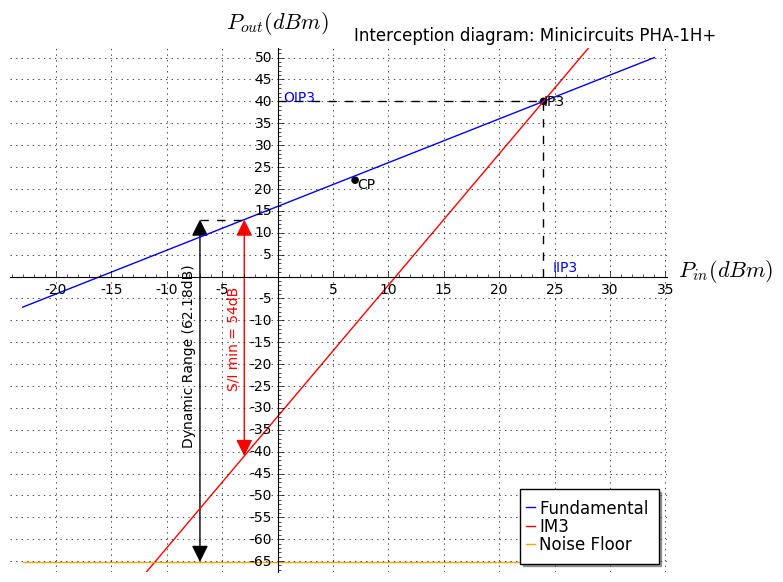

In [17]:
#Plot intercept diagram

# Plot settings
xmin = Pin_Upper_Limit - 20;
xmax = IIPn + 10;
ymin = No_dBm;
ymax = OIPn + 10;


fundamental = plot(P_out(P_in=P_in, G=G), (P_in, xmin, xmax), color='blue', legend_label='Fundamental')
IMn = plot(PoutIMN(P_in=P_in, n=n, G=G, IIPN=IIPn), (P_in, xmin, xmax), color='red', legend_label='IM'+str(n))

# IPn point
IPn = point((IIPn, OIPn), color='black', size=30)
IPn_text = text("IP"+str(n), (IIPn+1,OIPn), color = 'black')

#OIPn line
OIPn_line = line([(0,OIPn), (IIPn, OIPn)], linestyle='--', color='black')
OIPn_text = text("OIP"+str(n), (2,OIPn+1), color = 'blue')

#IIPn line
IIPn_line = line([(IIPn,0), (IIPn, OIPn)], linestyle='--', color='black')
IIPn_text = text("IIP"+str(n), (IIPn+2,2), color = 'blue')

# Compression point
CP = point((CPi, CPo), color='black', size=30)
CP_Text = text("CP", (CPi + 1, CPo - 1), color = 'black')

# Noise floor
noise_floor = plot(No_dBm, (P_in, xmin, xmax), color='orange', legend_label='Noise Floor')

# Dynamic range
shift = 4
Dynamic_Range = arrow((Pin_Upper_Limit-shift, No_dBm), (Pin_Upper_Limit-shift,Pout_Upper_Limit), head=2, color = 'black', width=1)
t = "Dynamic Range (" + str(DR.n(digits=4)) + "dB)"
DR_Text = text(t, (Pin_Upper_Limit-shift-1, Pout_Upper_Limit-DR/2), color = 'black', rotation=90)
DR_line = line([(Pin_Upper_Limit-shift,Pout_Upper_Limit), (Pin_Upper_Limit, Pout_Upper_Limit)], linestyle='--', color='black')

# Minimum S/I
SI = arrow((Pin_Upper_Limit,Pout_Upper_Limit), (Pin_Upper_Limit,Pout_Upper_Limit-SImin), head=2, color='red', width=1)
t = "S/I min = " + str(SImin) + "dB";
SI_text = text(t, (Pin_Upper_Limit-1, Pout_Upper_Limit-SImin/2), rotation=90, color = 'red')

P = fundamental + IMn + IPn + IPn_text + OIPn_line + OIPn_text + IIPn_line + IIPn_text + CP + CP_Text + noise_floor + Dynamic_Range + DR_Text
P = P + SI + DR_line + SI_text

title_text = "Interception diagram: " + Amplifier_name
P.set_legend_options(loc='lower right')
show(P,  axes_labels=['$P_{in} (dBm)$', '$P_{out} (dBm)$'], gridlines='Minor', ticks=[5,5], xmin = xmin, xmax=xmax, ymin = ymin, ymax=ymax, title=title_text, title_pos=[0.8,1])

Cascaded IP3
---

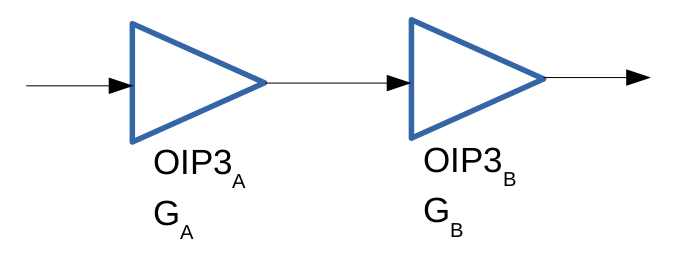

$OIP3_{CAS} = \frac{1}{ \frac{1}{OIP3B} + \frac{1}{OIP3A \cdot G_B}}$

In [18]:
def OIP3_cascade(OIP3A, OIP3B, GB):

    # Conversion to natural units
    OIP3A = 10^(0.1*(OIP3A-30)) # W
    OIP3B = 10^(0.1*(OIP3B-30)) # W
    GB = 10^(0.1*(GB)) # n.u.

    A = 1/(OIP3B);
    B = 1/(OIP3A*GB);
    return 10*log(1/(A + B)) + 30 #dBm

Example
---

In [120]:
OIP3A = 15 # dBm
OIP3B = 30 # dBm
GA = 10 #dB
GB = 15 #dB

G = GA + GB;
OIP3 = OIP3_cascade(OIP3A=OIP3A, OIP3B=OIP3B, GB=GB)
IIP3 = OIP3 - G;

print("OIP3 = " + str(OIP3.n(digits=4)) + " dBm")
print("IIP3 = " + str(IIP3.n(digits=4)) + " dBm")
print("G = " + str(G.n(digits=3)) + " dB")

OIP3 = 23.07 dBm
IIP3 = -1.931 dBm
G = 25.0 dB
